## Install Azure Librearies


In [1]:

import subprocess
import sys

# تثبيت الحزم المطلوبة
packages = ["pandas", "numpy", "scikit-learn", "scipy", "joblib", "matplotlib", "seaborn", "spacy"]
for package in packages:
    try:
        __import__(package.replace("-", "_"))
        print(f"✅ {package} already installed")
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
        print(f"✅ {package} installed")

# تحميل نموذج spacy
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    print("✅ spacy model already loaded")
except:
    print("📦 Downloading spacy model...")
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    print("✅ spacy model installed")

print("\n✨ All dependencies ready!")


✅ pandas already installed
✅ numpy already installed
📦 Installing scikit-learn...
✅ scikit-learn installed
✅ scipy already installed
✅ joblib already installed
✅ matplotlib already installed
✅ seaborn already installed
✅ spacy already installed
📦 Downloading spacy model...
✅ spacy model installed

✨ All dependencies ready!


In [1]:
!pip install azure-ai-ml azure-identity


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.3/191.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.8/217.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.5/284.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##2 Azure ML Workspace

In [6]:
from azure.identity import DeviceCodeCredential
from azure.ai.ml import MLClient

ml_client = MLClient.from_config(
    credential=DeviceCodeCredential(),
    path="config.json"
)

print("Connected to Azure Machine Learning Workspace ✅")

Found the config file in: config.json


Connected to Azure Machine Learning Workspace ✅


In [5]:
## test connection
ml_client.workspaces.get(ml_client.workspace_name)


CredentialUnavailableError: Failed to open a browser

# Step 1: Data Loading and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [3]:
# Load the data from CSV files
users = pd.read_csv("users_edu_5000.csv")
content = pd.read_csv("content_edu_2000.csv")
interactions = pd.read_csv("interactions_edu_200000.csv")

print("Data loaded successfully!")
print(f"Users shape: {users.shape}")
print(f"Content shape: {content.shape}")
print(f"Interactions shape: {interactions.shape}")

Data loaded successfully!
Users shape: (5000, 5)
Content shape: (2000, 8)
Interactions shape: (200000, 5)


In [10]:
users.head()

,user_id,age,interest,level,learning_style
0,1,48,neuroscience,Intermediate,audio
1,2,38,mathematics,Beginner,audio
2,3,24,psychology,Intermediate,audio
3,4,52,problem-solving,Beginner,audio
4,5,17,memory,Advanced,audio


In [11]:
interactions.head()

,user_id,content_id,time_spent,rating,timestamp
0,239,442,687,2,2024-06-12 06:19:55
1,2330,684,1999,1,2025-06-28 04:26:12
2,2888,1010,1057,4,2024-07-14 02:00:35
3,3107,661,561,2,2025-10-10 17:36:46
4,3642,1218,1328,3,2025-04-21 13:03:40


In [12]:
content.head()

,content_id,title,description,category,level,duration,difficulty,rating
0,1,Course 1 - Bootcamp,Synthetic course about problem-solving,attention,Advanced,196,2,4.08
1,2,Course 2 - Essentials,Synthetic course about problem-solving,creativity,Beginner,134,3,4.24
2,3,Course 3 - Bootcamp,Synthetic course about logic,logic,Advanced,189,1,3.48
3,4,Course 4 - Mastery,Synthetic course about coding,problem-solving,Beginner,31,3,3.43
4,5,Course 5 - Mastery,Synthetic course about attention,logic,Beginner,98,1,4.19


# Basic Operations - Merge Data

In [4]:
# Merge interactions with users and content
train_data = interactions.merge(users, left_on='user_id', right_on='user_id')
train_data = train_data.merge(content, on='content_id')

print(f"Merged data shape: {train_data.shape}")
print(f"Merged data columns: {train_data.columns.tolist()}")

Merged data shape: (200000, 16)
Merged data columns: ['user_id', 'content_id', 'time_spent', 'rating_x', 'timestamp', 'age', 'interest', 'level_x', 'learning_style', 'title', 'description', 'category', 'level_y', 'duration', 'difficulty', 'rating_y']


In [14]:
train_data.shape

(200000, 16)

In [15]:
train_data.isnull().sum()

,0
user_id,0
content_id,0
time_spent,0
rating_x,0
timestamp,0
age,0
interest,0
level_x,0
learning_style,0
title,0


In [5]:
# Data Cleaning
train_data['rating_y'] = train_data['rating_y'].fillna(0)
train_data['category'] = train_data['category'].fillna('')
train_data['description'] = train_data['description'].fillna('')

print("Data cleaned successfully")

Data cleaned successfully


In [17]:
train_data.isnull().sum()

,0
user_id,0
content_id,0
time_spent,0
rating_x,0
timestamp,0
age,0
interest,0
level_x,0
learning_style,0
title,0


In [18]:
train_data.duplicated().sum()

np.int64(0)

In [19]:
# Rename columns for consistency
column_name_mapping = {
    'user_id': 'UserID',
    'content_id': 'ContentID',
    'title': 'Title',
    'description': 'Description',
    'category': 'Category',
    'level': 'Level',
    'difficulty': 'Difficulty',
    'rating': 'Rating',
    'time_spent': 'TimeSpent',
    'interest': 'Interest',
    'learning_style': 'LearningStyle'
}

train_data.rename(columns=column_name_mapping, inplace=True)
print("Columns renamed successfully")

Columns renamed successfully


# Step 2: EDA (Exploratory Data Analysis)

In [20]:
num_users = train_data['UserID'].nunique()
num_items = train_data['ContentID'].nunique()
num_ratings = train_data['rating_y'].nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique contents: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 4873
Number of unique contents: 1970
Number of unique ratings: 251


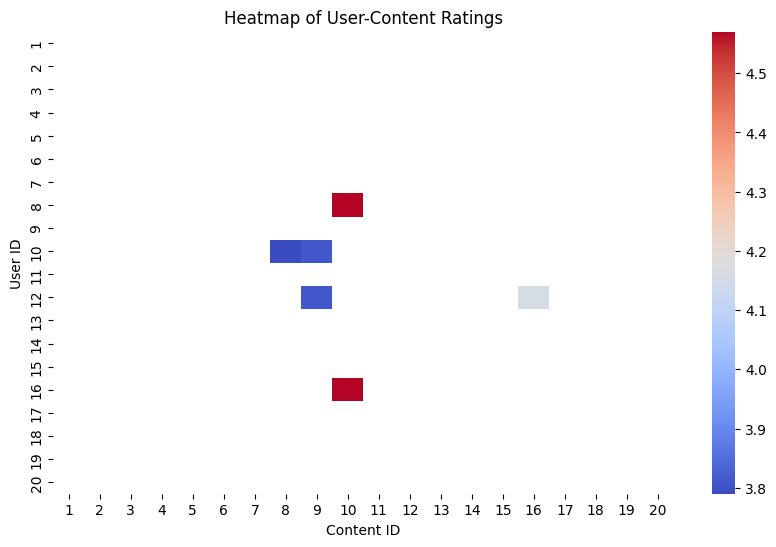

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = train_data.pivot_table(
    index='UserID',
    columns='ContentID',
    values='rating_y'
)

sample_heatmap = heatmap_data.iloc[:20, :20]

plt.figure(figsize=(10, 6))
sns.heatmap(sample_heatmap, cmap='coolwarm', cbar=True)
plt.title('Heatmap of User-Content Ratings')
plt.xlabel('Content ID')
plt.ylabel('User ID')
plt.show()

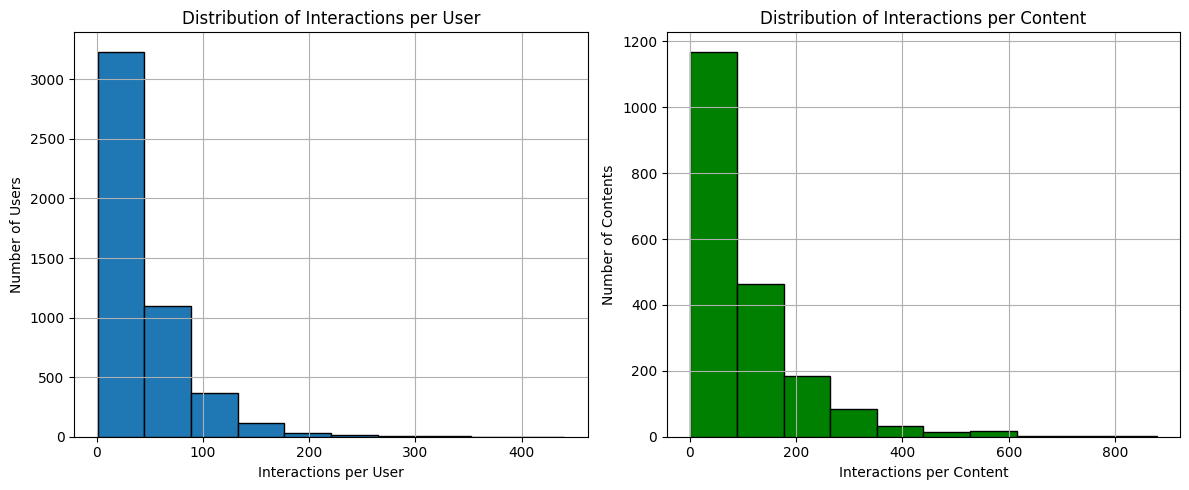

In [22]:
# Distribution of interactions for the dataset
plt.figure(figsize=(12, 5))

# Interactions per user
plt.subplot(1, 2, 1)
interactions['user_id'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

# Interactions per content
plt.subplot(1, 2, 2)
interactions['content_id'].value_counts().hist(bins=10, edgecolor='k', color='green')
plt.xlabel('Interactions per Content')
plt.ylabel('Number of Contents')
plt.title('Distribution of Interactions per Content')

plt.tight_layout()
plt.show()

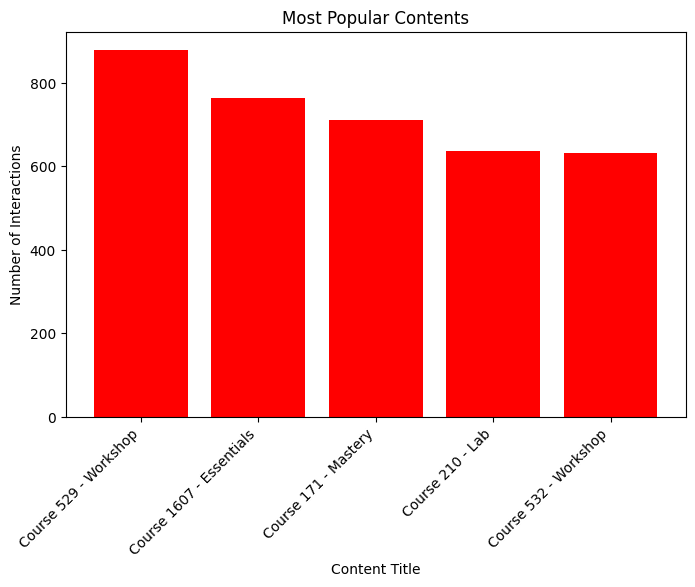

In [23]:
# Most popular contents
popular_contents = interactions['content_id'].value_counts().head(5)
popular_contents_df = popular_contents.reset_index()
popular_contents_df.columns = ['content_id', 'interaction_count']
popular_contents_df = popular_contents_df.merge(content[['content_id','title']], on='content_id', how='left')

plt.figure(figsize=(8,5))
plt.bar(popular_contents_df['title'], popular_contents_df['interaction_count'], color='red')
plt.xticks(rotation=45, ha='right')
plt.title("Most Popular Contents")
plt.xlabel("Content Title")
plt.ylabel("Number of Interactions")
plt.show()

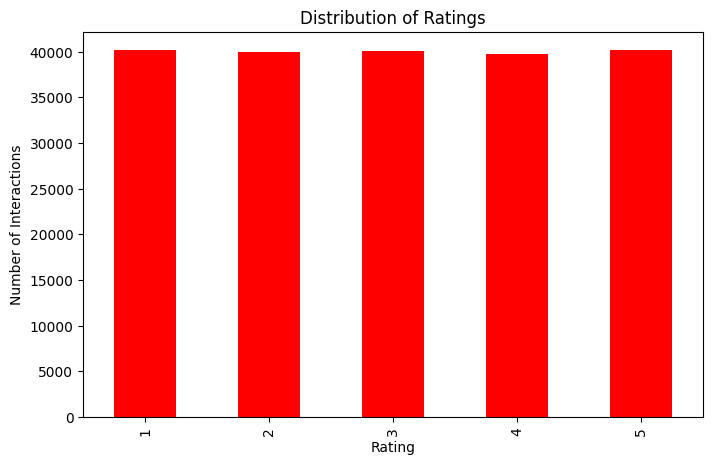

In [24]:
# Distribution of ratings
plt.figure(figsize=(8,5))
interactions['rating'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Interactions")
plt.show()

# Step 3: Data Cleaning and Tags Creation

In [25]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load spacy model
nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    if pd.isna(text):
        return ""
    doc = nlp(text.lower())
    tags = [
        token.text
        for token in doc
        if token.is_alpha and token.text not in STOP_WORDS
    ]
    return " ".join(tags)

# Extract tags from columns
columns_to_extract_tags_from = ['category', 'description', 'level']

for column in columns_to_extract_tags_from:
    content[column] = content[column].astype(str).apply(clean_and_extract_tags)

print("Tags extracted successfully")

Tags extracted successfully


In [26]:
# Combine tags into single column
content['tags'] = content[columns_to_extract_tags_from].agg(' '.join, axis=1)
print("Tags combined successfully")

Tags combined successfully


# Rating-Based Recommendations System (Trending Content)

In [27]:
interaction_counts = interactions.groupby('content_id').size().reset_index(name='interaction_count')

average_ratings = content.merge(interaction_counts, on='content_id')

average_ratings = average_ratings.groupby(
    ['content_id', 'title', 'category', 'level', 'duration']
).agg(
    avg_rating=('rating', 'mean'),
    interaction_count=('interaction_count', 'sum')
).reset_index()

print("Average ratings calculated")

Average ratings calculated


In [28]:
top_rated_items = average_ratings.sort_values(
    by=['avg_rating', 'interaction_count'],
    ascending=[False, False]
)

rating_base_recommendation = top_rated_items.head(10)
print("Top rated items:")
print(rating_base_recommendation[['title', 'avg_rating', 'interaction_count', 'category', 'level']])

Top rated items:
                         title  avg_rating  interaction_count  \
1432    Course 1454 - Workshop        5.00                 57   
413           Course 416 - Lab        5.00                 12   
1165         Course 1184 - Lab        4.99                259   
1862    Course 1891 - Bootcamp        4.99                 92   
1059    Course 1077 - Bootcamp        4.99                 79   
1968         Course 1999 - Lab        4.99                  2   
1582  Course 1608 - Essentials        4.98                308   
1494  Course 1516 - Essentials        4.98                269   
1052    Course 1070 - Workshop        4.98                249   
1895    Course 1925 - Workshop        4.98                171   

             category         level  
1432       creativity      beginner  
413             logic  intermediate  
1165  problem solving      advanced  
1862  problem solving      advanced  
1059       creativity  intermediate  
1968       creativity      beginner  
1

# Content-Based Recommendation System

In [ ]:
# Cell: imports and data load
import pandas as pd
import numpy as np
from pathlib import Path
pd.options.display.max_columns = 50

DATA_DIR = Path('.')
content_path = DATA_DIR / 'content_edu_2000.csv'
interactions_path = DATA_DIR / 'interactions_edu_200000.csv'

content = pd.read_csv(content_path)
interactions = pd.read_csv(interactions_path, parse_dates=['timestamp'], infer_datetime_format=True)

print('content shape:', content.shape)
print('interactions shape:', interactions.shape)

content.head()


In [6]:
# Cell: cleaning, text construction, TF-IDF
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from scipy import sparse

# simple cleaner
def clean_text(s):
    if pd.isna(s):
        return ''
    s = str(s).lower()
    s = re.sub(r'[^a-z0-9\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

content['text'] = (
    content['title'].fillna('') + ' ' +
    content['description'].fillna('') + ' ' +
    content['category'].fillna('') + ' ' +
    content['level'].fillna('')
).apply(clean_text)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(content['text'])

# save artifacts
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
sparse.save_npz('tfidf_matrix.npz', tfidf_matrix)

print('TF-IDF computed. matrix shape =', tfidf_matrix.shape)


TF-IDF computed. matrix shape = (2000, 5000)


In [8]:
# Cell: similarity & recommendation helpers
from sklearn.metrics.pairwise import linear_kernel
from scipy import sparse
import joblib
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np

vec_path = Path('tfidf_vectorizer.joblib')
mat_path = Path('tfidf_matrix.npz')

if mat_path.exists() and vec_path.exists():
    tfidf_matrix = sparse.load_npz(mat_path)
    vectorizer = joblib.load(vec_path)
    print('Loaded TF-IDF artifacts from disk.')
else:
    print('TF-IDF artifacts not found — computing now.')
    # ensure content['text'] exists and is cleaned
    def clean_text(s):
        if pd.isna(s):
            return ''
        s = str(s).lower()
        s = re.sub(r'[^a-z0-9\s]', ' ', s)
        s = re.sub(r'\s+', ' ', s).strip()
        return s

    if 'text' not in content.columns or content['text'].isnull().all():
        content['text'] = (
            content['title'].fillna('') + ' ' +
            content['description'].fillna('') + ' ' +
            content['category'].fillna('') + ' ' +
            content['level'].fillna('')
        ).apply(clean_text)

    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(content['text'])
    joblib.dump(vectorizer, vec_path.as_posix())
    sparse.save_npz(mat_path.as_posix(), tfidf_matrix)
    print('TF-IDF computed and saved.')


def recommend_by_item(content_id, top_k=10):
    idxs = content[content['content_id']==int(content_id)].index
    if len(idxs)==0:
        return pd.DataFrame()
    idx = idxs[0]
    sims = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    sims[idx] = 0
    top_idx = sims.argsort()[::-1][:top_k]
    return content.iloc[top_idx][['content_id','title','category']].assign(score=sims[top_idx])


def recommend_for_user(user_id, top_k=10):
    user_id = int(user_id)
    user_rows = interactions[interactions['user_id']==user_id]
    if user_rows.empty:
        return recommend_by_item(1, top_k)
    top_items = user_rows.sort_values(['rating','time_spent'], ascending=False).head(10)['content_id'].unique()
    item_indices = content[content['content_id'].isin(top_items)].index
    if len(item_indices)==0:
        return recommend_by_item(1, top_k)
    user_vec = np.asarray(tfidf_matrix[item_indices].mean(axis=0))
    sims = linear_kernel(user_vec, tfidf_matrix).flatten()
    seen = set(user_rows['content_id'].astype(int).tolist())
    ranked = [(i,s) for i,s in enumerate(sims) if content.iloc[i]['content_id'] not in seen]
    ranked.sort(key=lambda x: x[1], reverse=True)
    top_idx = [i for i,s in ranked[:top_k]]
    return content.iloc[top_idx][['content_id','title','category']].assign(score=[s for i,s in ranked[:top_k]])

# examples
print('Recommendations for content 1:')
print(recommend_by_item(1, top_k=5))

sample_user = interactions['user_id'].iloc[0]
print('\nRecommendations for user', sample_user)
print(recommend_for_user(sample_user, top_k=5))


Loaded TF-IDF artifacts from disk.
Recommendations for content 1:
     content_id                    title      category     score
5             6      Course 6 - Bootcamp  neuroscience  0.540555
2             3      Course 3 - Bootcamp         logic  0.533387
6             7      Course 7 - Bootcamp    creativity  0.501951
204         205  Course 205 - Essentials     attention  0.454621
736         737     Course 737 - Mastery     attention  0.454412

Recommendations for user 239
     content_id                    title    category     score
1             2    Course 2 - Essentials  creativity  0.141343
6             7      Course 7 - Bootcamp  creativity  0.133137
399         400  Course 400 - Essentials  creativity  0.132607
516         517  Course 517 - Essentials  creativity  0.132607
555         556  Course 556 - Essentials  creativity  0.132607
